In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('drive/My Drive')

In [5]:
cd darknet

/content/drive/My Drive/darknet


      Unnamed: 0         x         y         w         h   relation
0              0  0.980791  0.981541  0.975131  0.979389  [1, 0, 0]
1              1  0.999702  0.999853  0.995836  0.999869  [1, 0, 0]
2              5  0.965482  0.964885  0.935164  0.963710  [1, 0, 0]
3              6  0.910410  0.911998  0.892446  0.874661  [1, 0, 0]
4             16  0.974035  0.962761  0.924911  0.952380  [1, 0, 0]
...          ...       ...       ...       ...       ...        ...
2104        8322  0.999725  0.998967  0.996841  0.998206  [1, 0, 0]
2105        8324  0.999169  0.998858  0.989419  0.997060  [1, 0, 0]
2106        8332  0.959627  0.999752  0.990559  0.993217  [1, 0, 0]
2107        8351  0.855777  0.848944  0.856142  0.850662  [1, 0, 0]
2108        8354  0.396230  0.404404  0.448867  0.425630  [1, 0, 0]

[2109 rows x 6 columns]
      Unnamed: 0         x         y         w         h
0              0  0.980791  0.981541  0.975131  0.979389
1              1  0.999702  0.999853  0.99583

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model']

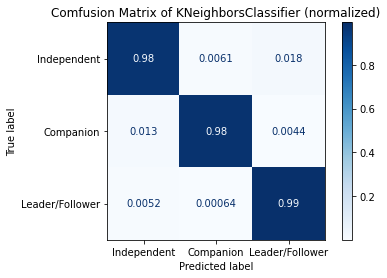

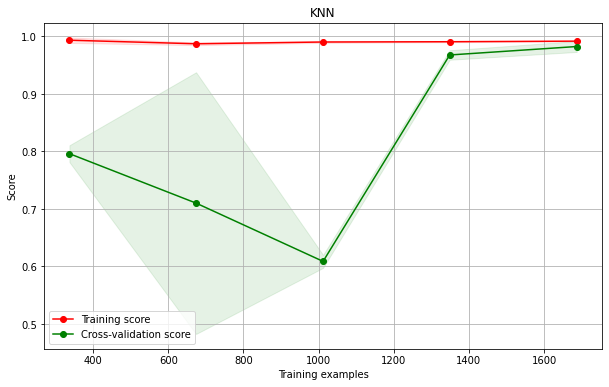

In [8]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import metrics
a1=pd.read_csv("training_data.csv")
print(a1)
print(a1.drop("relation", axis = 1))
print(a1["relation"])
data = a1.drop("relation", axis = 1)
label = a1["relation"]
train_data , test_data , train_label , test_label = train_test_split(data,label,test_size=0.2)
knn = KNeighborsClassifier()
knn.fit(train_data,train_label)
print(knn.predict(test_data))
print(test_label)
accuracy = metrics.accuracy_score(test_label, knn.predict(test_data))
print(accuracy)

import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#confusion_matrix=confusion_matrix(label, knn.predict(data),labels=[[1,0,0],[0,1,0],[0,0,1]])
import numpy as np 
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
confusion_matrix=np.matrix(confusion_matrix) 
print(confusion_matrix)

disp=plot_confusion_matrix(knn,data,label,display_labels=['Independent', 'Companion', 'Leader/Follower'],cmap=plt.cm.Blues,normalize='true')
disp.ax_.set_title("Comfusion Matrix of KNeighborsClassifier (normalized)")




"""
train_sizes,train_score,test_score = learning_curve(knn,data,label,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()
"""
"""
train_sizes,train_score,test_score = learning_curve(knn,data,label,train_sizes=[0.1,0.2,0.4,0.6,0.8,1],cv=10)
train_acc =  np.mean(train_score,axis=1)
test_acc = np.mean(test_score,axis=1)
plt.plot(train_sizes,train_acc,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_acc,'o-',color = 'g',label = 'testing')
plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('accuracy')
plt.show()
"""


import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10,6))  #調整圖的大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


from sklearn.model_selection import KFold,StratifiedKFold
cv = KFold(n_splits=5, random_state=4, shuffle=True)

plot_learning_curve(knn, "KNN", data, label, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5)) 

from sklearn.externals import joblib
joblib.dump(knn,'model')

In [ ]:
from sklearn.externals import joblib
joblib.load('/model')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')